In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
from skimage.io import imread
from skimage.transform import resize
import os

In [2]:
# Specify the path to the dataset directory
dataset_path = r"dataset\training_set\training_set"

# Initialize lists to store the image data and corresponding labels
images = []
labels = []

# Process the cat images
cat_path = os.path.join(dataset_path, "cats")
for image_name in os.listdir(cat_path):
    image_path = os.path.join(cat_path, image_name)
    img = imread(image_path)
    img_resized = resize(img, (150, 150))  # Resize the image to a fixed size
    images.append(img_resized.flatten())  # Flatten the image and add it to the list
    labels.append(0)  # Assign label 0 to cats

# Process the dog images
dog_path = os.path.join(dataset_path, "dogs")
for image_name in os.listdir(dog_path):
    image_path = os.path.join(dog_path, image_name)
    img = imread(image_path)
    img_resized = resize(img, (150, 150))  # Resize the image to a fixed size
    images.append(img_resized.flatten())  # Flatten the image and add it to the list
    labels.append(1)  # Assign label 1 to dogs

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [3]:
# Reduce the dimensionality of the image data using PCA

pca = PCA(n_components=100)
images_pca = pca.fit_transform(images)

In [4]:
#split dataset into testing and training datasets

X_train, X_test, y_train, y_test = train_test_split(images_pca, labels, test_size=0.2, random_state=42)


In [5]:
# Create an SVM classifier
svm_model = svm.SVC(kernel='rbf', C= 1, gamma = 'scale')

# Train the model
svm_model.fit(X_train, y_train)

SVC(C=1)

In [6]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

Precision: 0.5761904761904761
Recall: 0.6419098143236074
F1 Score: 0.6072772898368882
Accuracy: 0.6092384519350812
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       424
           1       0.58      0.64      0.61       377

    accuracy                           0.61       801
   macro avg       0.61      0.61      0.61       801
weighted avg       0.61      0.61      0.61       801

Confusion Matrix:


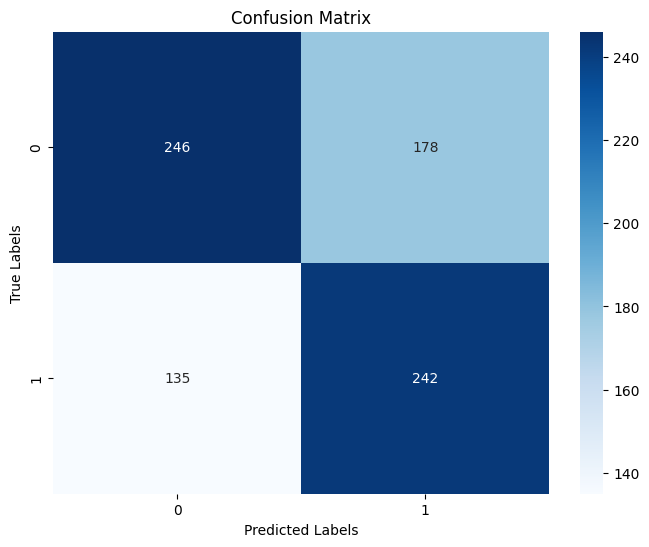

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Calculate precision, recall, F1 score and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()